In [199]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
sns.set_style("darkgrid")
col_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
data = pd.read_csv("../titanic.csv",skiprows=1, header= 0,names=col_names)
data.dropna(subset=["Embarked","Age"], inplace=True)
data.drop("Name",axis=1,inplace=True)
data.drop("SibSp",axis=1,inplace=True)
data.drop("Parch",axis=1,inplace=True)
data.drop("Ticket",axis=1,inplace=True)
data.drop("Cabin",axis=1,inplace=True)
data.drop("PassengerId",axis=1,inplace=True)

data["Sex"]=label_encoder.fit_transform(data["Sex"])
data["Embarked"]=label_encoder.fit_transform(data["Embarked"])
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,1,0,38.0,71.2833,0
1,1,3,0,26.0,7.9250,2
2,1,1,0,35.0,53.1000,2
3,0,3,1,35.0,8.0500,2
5,0,1,1,54.0,51.8625,2
6,0,3,1,2.0,21.0750,2
7,1,3,0,27.0,11.1333,2
8,1,2,0,14.0,30.0708,0
9,1,3,0,4.0,16.7000,2
10,1,1,0,58.0,26.5500,2


In [200]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    sum=0
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
         
    return prior

In [201]:
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [202]:
def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[1:]

    # calculate prior
    prior = calculate_prior(df, Y)
    
    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

[[111  18]
 [ 29  56]]
0.7648406630660961


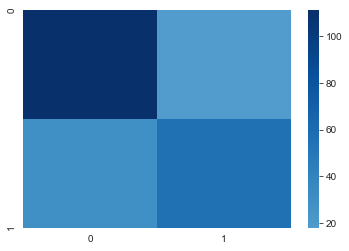

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
loo.get_n_splits(X)
train, test = train_test_split(data, test_size=.3, random_state=41)

X_test = test.iloc[:,1:].values
Y_test = test.iloc[:,0].values


Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Survived")


from sklearn.metrics import confusion_matrix, f1_score

print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred, average='macro'))

sns.heatmap(confusion_matrix(Y_test, Y_pred),center=0,cmap="Blues");